In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [ ]:
# The function is defined with default parameters so that if you call it with just your data, it will construct a DataFrame with t-1
# as X and t as y

def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]

    df = pd.DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [ ]:
df_final = pd.read_csv('/content/Time_multivariate.csv')

In [ ]:
df_final

,Unnamed: 0,TIME,amplitude,duration,energy,rms,rise_time,counts,Force
0,0,1.104071e+08,0.000233,2.718000e-04,112.955078,0.000064,2.700000e-06,18,1127.513
1,1,1.192939e+08,0.000106,9.000000e-07,23.840845,0.000515,1.000000e-07,1,1127.513
2,2,1.216748e+08,0.000202,8.656000e-04,226.100244,0.000051,2.010000e-05,43,2352.635
3,3,1.338993e+08,0.000105,1.000000e-07,14.967017,0.001223,1.000000e-07,1,3427.315
4,4,1.402966e+08,0.000186,5.585000e-04,151.914893,0.000052,1.190000e-05,24,4408.630
...,...,...,...,...,...,...,...,...,...
4836,4836,3.119715e+10,0.000223,8.996000e-04,375.983716,0.000065,2.154000e-04,130,53541.380
4837,4837,3.120151e+10,0.000798,9.135900e-03,14549.509741,0.000126,1.207200e-03,2298,53541.380
4838,4838,3.120221e+10,0.000255,3.615800e-03,964.852539,0.000052,1.616000e-04,257,53541.380
4839,4839,3.120404e+10,0.000125,3.378000e-04,141.166748,0.000065,2.856000e-04,8,53541.380


In [ ]:
df_final.drop(columns=df_final.columns[[0,8]], axis=1, inplace=True)

In [ ]:
df1=df_final

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_final = pd.read_csv('/content/Time_multivariate.csv')

In [ ]:
df_final

,Unnamed: 0,TIME,amplitude,duration,energy,rms,rise_time,counts,Force
0,0,1.104071e+08,0.000233,2.718000e-04,112.955078,0.000064,2.700000e-06,18,1127.513
1,1,1.192939e+08,0.000106,9.000000e-07,23.840845,0.000515,1.000000e-07,1,1127.513
2,2,1.216748e+08,0.000202,8.656000e-04,226.100244,0.000051,2.010000e-05,43,2352.635
3,3,1.338993e+08,0.000105,1.000000e-07,14.967017,0.001223,1.000000e-07,1,3427.315
4,4,1.402966e+08,0.000186,5.585000e-04,151.914893,0.000052,1.190000e-05,24,4408.630
...,...,...,...,...,...,...,...,...,...
4836,4836,3.119715e+10,0.000223,8.996000e-04,375.983716,0.000065,2.154000e-04,130,53541.380
4837,4837,3.120151e+10,0.000798,9.135900e-03,14549.509741,0.000126,1.207200e-03,2298,53541.380
4838,4838,3.120221e+10,0.000255,3.615800e-03,964.852539,0.000052,1.616000e-04,257,53541.380
4839,4839,3.120404e+10,0.000125,3.378000e-04,141.166748,0.000065,2.856000e-04,8,53541.380


In [ ]:
df_final.drop(columns=df_final.columns[0], axis=1, inplace=True)

In [ ]:
df1=df_final[["TIME","rise_time","rms", "duration", "counts", "energy","amplitude"]]

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Scaling the entire dataset


values = df1.values

values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
# converting the dataset as supervised learning

reframed = series_to_supervised(scaled, 1, 1)
print(reframed.shape)

(4840, 14)


In [ ]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)     var6(t-1)  \
1   0.000000   0.000025   0.004522   0.002591   0.001462  1.211768e-06   
2   0.000286   0.000000   0.038055   0.000008   0.000081  2.369511e-07   
3   0.000362   0.000191   0.003527   0.008254   0.003493  2.449459e-06   
4   0.000756   0.000000   0.090841   0.000000   0.000081  1.398806e-07   
5   0.000961   0.000113   0.003605   0.005325   0.001950  1.637948e-06   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)       var6(t)  \
1   0.001317  0.000286  0.000000  0.038055  0.000008  0.000081  2.369511e-07   
2   0.000047  0.000362  0.000191  0.003527  0.008254  0.003493  2.449459e-06   
3   0.001003  0.000756  0.000000  0.090841  0.000000  0.000081  1.398806e-07   
4   0.000031  0.000961  0.000113  0.003605  0.005325  0.001950  1.637948e-06   
5   0.000847  0.001091  0.000527  0.008739  0.016562  0.033634  2.783307e-05   

    var7(t)  
1  0.000047  
2  0.001003  
3  0.000031  
4  0.000847  
5  0

In [ ]:
reframed.columns

Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var1(t)', 'var2(t)', 'var3(t)', 'var4(t)',
       'var5(t)', 'var6(t)', 'var7(t)'],
      dtype='object')

In [ ]:
# droping columns we don't want to predict

reframed.drop(reframed.columns[[7,8,9,10,11,12]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)     var6(t-1)  \
1   0.000000   0.000025   0.004522   0.002591   0.001462  1.211768e-06   
2   0.000286   0.000000   0.038055   0.000008   0.000081  2.369511e-07   
3   0.000362   0.000191   0.003527   0.008254   0.003493  2.449459e-06   
4   0.000756   0.000000   0.090841   0.000000   0.000081  1.398806e-07   
5   0.000961   0.000113   0.003605   0.005325   0.001950  1.637948e-06   

   var7(t-1)   var7(t)  
1   0.001317  0.000047  
2   0.000047  0.001003  
3   0.001003  0.000031  
4   0.000031  0.000847  
5   0.000847  0.005456  


In [ ]:
values = reframed.values

# We train the model on the 1st 3 years and then test on the last year (for now)
n_train_hours = 4600

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D :- (no.of samples, no.of timesteps, no.of features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(4600, 1, 7) (4600,) (240, 1, 7) (240,)


In [ ]:
train.shape, test.shape, values.shape

((4600, 8), (240, 8), (4840, 8))

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=64, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/50
58/58 - 3s - loss: 0.0022 - val_loss: 0.0084 - 3s/epoch - 58ms/step
Epoch 2/50
58/58 - 0s - loss: 0.0023 - val_loss: 0.0084 - 408ms/epoch - 7ms/step
Epoch 3/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0084 - 374ms/epoch - 6ms/step
Epoch 4/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0084 - 401ms/epoch - 7ms/step
Epoch 5/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0085 - 388ms/epoch - 7ms/step
Epoch 6/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0085 - 400ms/epoch - 7ms/step
Epoch 7/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0085 - 408ms/epoch - 7ms/step
Epoch 8/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0085 - 284ms/epoch - 5ms/step
Epoch 9/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0085 - 302ms/epoch - 5ms/step
Epoch 10/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0085 - 277ms/epoch - 5ms/step
Epoch 11/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0085 - 283ms/epoch - 5ms/step
Epoch 12/50
58/58 - 0s - loss: 0.0022 - val_loss: 0.0086 - 268ms/epoch - 5ms/step
Epoch 13/50
58/58 - 0s - lo

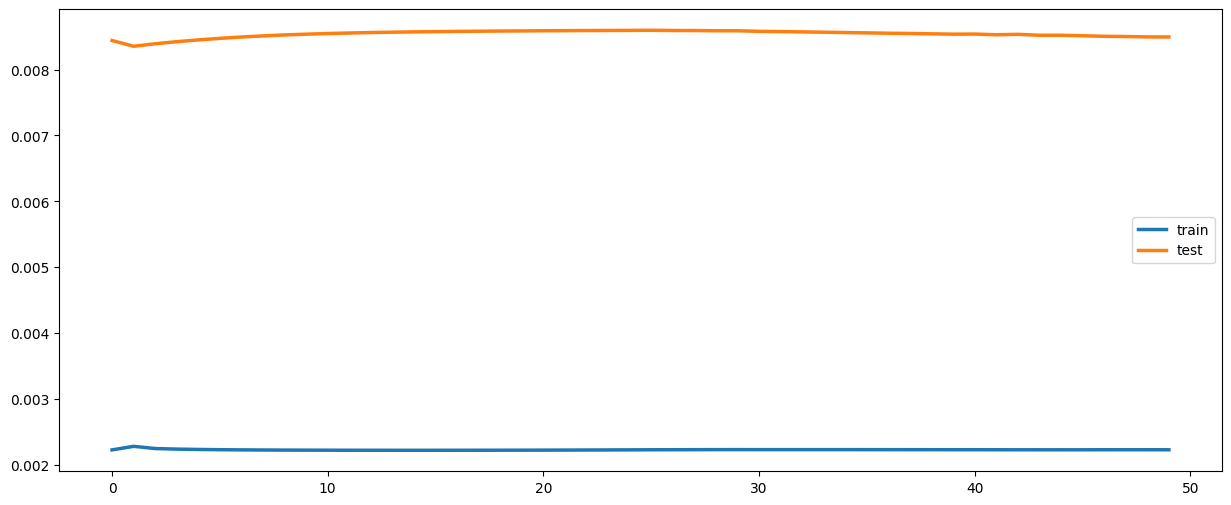

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='train', linewidth = 2.5)
plt.plot(history.history['val_loss'], label='test',  linewidth = 2.5)
plt.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             18432     
                                                                 
 dense_2 (Dense)             (None, 1, 1)              65        
                                                                 
Total params: 18497 (72.25 KB)
Trainable params: 18497 (72.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


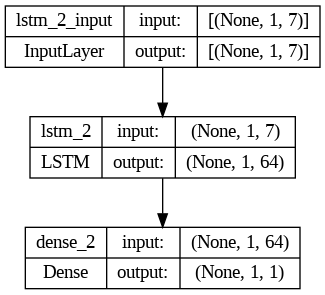

In [ ]:
model.summary()


tf.keras.utils.plot_model(model, to_file="model.png",
           expand_nested=True, show_shapes=True)

In [ ]:
test_X.shape

(240, 1, 7)

In [ ]:
testPredict = model.predict(test_X)
print(testPredict.shape)
testPredict = testPredict.ravel()

print(testPredict.shape)

8/8 [==============================] - 1s 3ms/step
(240, 1, 1)
(240,)


In [ ]:
testPredict1 = model.predict(test_X)
print(testPredict1.shape)
testPredict1 = testPredict1.ravel()

print(testPredict1.shape)

8/8 [==============================] - 0s 3ms/step
(240, 1, 1)
(240,)


In [ ]:
test.shape

(240, 8)

In [ ]:
y_test_true1 = test[:,7]

In [ ]:
poll = np.array(df1["amplitude"])

meanop = poll.mean()
stdop = poll.std()

y_test_true = y_test_true1*stdop + meanop
testPredict = testPredict*stdop + meanop

In [ ]:
num_list = list(range(1, 241))

In [ ]:
len(num_list)

240

In [ ]:
len(y_test_true)

240

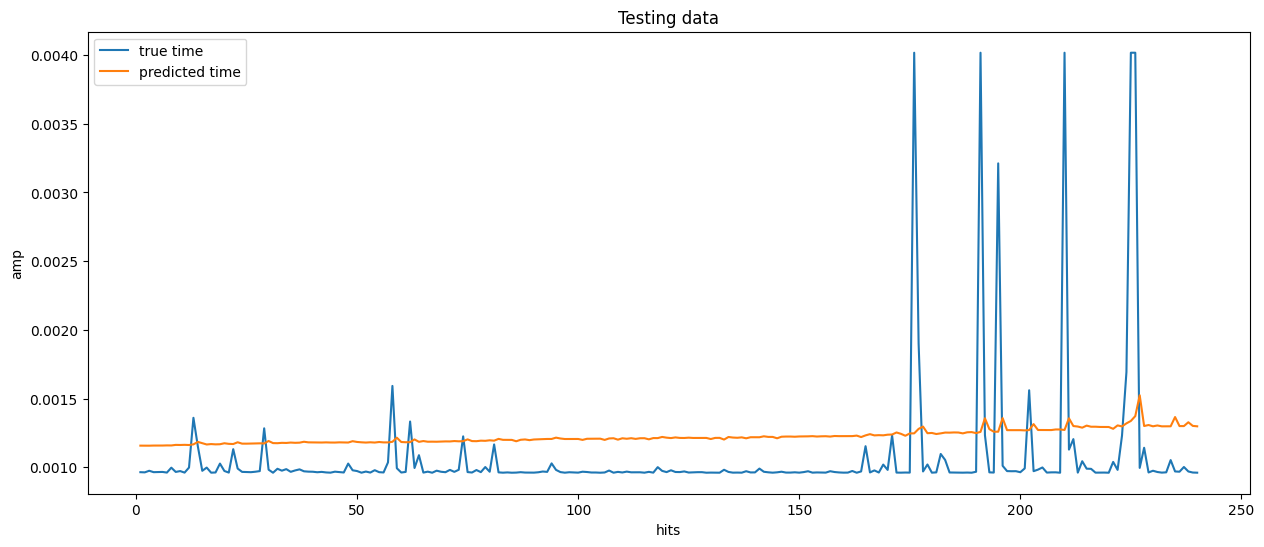

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))

plt.ylabel("amp")
plt.xlabel("hits")
plt.plot(num_list, y_test_true,label='true time')
plt.plot(num_list, testPredict,label='predicted time')
plt.title("Testing data")
plt.legend(loc='best')
plt.show()



In [ ]:
model.save('ampl.keras')

In [ ]:
model.save('ampl.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import keras

In [ ]:
model = keras.models.load_model('/content/ampl.keras')

In [ ]:
! pip install vallenae

In [ ]:
from pathlib import Path


import vallenae as vae

In [ ]:
i=0
x=[]
while True:
    PRIDB  = Path('/content/real_time_plotting.pridb')
    with vae.io.PriDatabase(PRIDB) as pridb:
        full_df = pridb.read_hits()
    filtered_df = full_df[["time","rise_time","rms", "duration", "counts", "energy","amplitude"]]

    x=filtered_df.values[i]
    y= np.asarray(x).astype(np.float32)
    y.reshape((1,1, 7))
    #x=x.tolist()
    #y=x.to_numpy()
    pred= model.predict(y)





    plt.plot(pred)

    i=i+1

Hits: 100%|██████████| 218/218 [00:00<00:00, 32221.81it/s]


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "lstm_2" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None
